# Closed Form Soln for Linear Regression (ChatGPT)

The closed-form solution for linear regression, also known as the normal equation, is a mathematical expression that directly computes the optimal parameters (coefficients) of the linear regression model. In the case of simple linear regression (one input feature), the closed-form solution is given by:

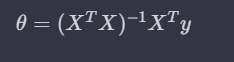

where:
- \( \theta \) is the vector of parameters (coefficients),
- \( X \) is the design matrix of input features,
- \( y \) is the vector of target values.

The closed-form solution has some advantages, particularly when dealing with small-sized datasets:

1. **Exact Solution:** The closed-form solution provides the exact solution to the linear regression problem without the need for iterative optimization algorithms (e.g., gradient descent). This can be advantageous when dealing with small datasets because it avoids the computational cost associated with iterative optimization.

2. **No Need for Feature Scaling:** Closed-form solutions do not require feature scaling. Feature scaling, such as normalization, is often recommended for some optimization-based algorithms to ensure convergence, but the closed-form solution can handle unnormalized features without convergence issues.

3. **Efficient for Small Datasets:** For small-sized datasets, the computational overhead of inverting the matrix \(X^TX\) and multiplying matrices is manageable. The computational complexity of the closed-form solution is dominated by the matrix inversion, which has a time complexity of approximately O(n^3), where n is the number of features. In practice, for small datasets, this computational cost is reasonable.

However, it's important to note that the closed-form solution has some limitations:

- **Computational Complexity:** The closed-form solution involves matrix inversion, which has a cubic time complexity. For large datasets, this can become computationally expensive, making iterative optimization algorithms like gradient descent more practical.

- **Numerical Stability:** The matrix inversion operation may suffer from numerical instability, especially if \(X^TX\) is ill-conditioned or singular. In such cases, regularization techniques may be employed to improve stability.

In summary, the closed-form solution for linear regression can work well on unnormalized small-sized datasets because it provides an exact solution without the need for iterative optimization and handles unnormalized features efficiently. As the dataset size grows, or if numerical stability becomes an issue, iterative optimization methods may be preferred.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from lab_utils_multi import load_house_data
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

In [2]:
X_train = np.array([1.0, 2.0])   #features
y_train = np.array([300, 500])   #target value

In [3]:
linear_model = LinearRegression()
#X must be a 2-D Matrix
linear_model.fit(X_train.reshape(-1, 1), y_train) 

LinearRegression()

In [4]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

w = [200.], b = 100.00
'manual' prediction: f_wb = wx+b : [240100.]


In [5]:
y_pred = linear_model.predict(X_train.reshape(-1, 1))

print("Prediction on training set:", y_pred)

X_test = np.array([[1200]])
print(f"Prediction for 1200 sqft house: ${linear_model.predict(X_test)[0]:0.2f}")

Prediction on training set: [300. 500.]
Prediction for 1200 sqft house: $240100.00


In [6]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [8]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [  0.27 -32.62 -67.25  -1.47], b = 220.42


In [9]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")

Prediction on training set:
 [295.18 485.98 389.52 492.15]
prediction using w,b:
 [295.18 485.98 389.52 492.15]
Target values 
 [300.  509.8 394.  540. ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709.09
